In [3]:
! pip install wordcloud

! pip install scikit-learn
! pip install nltk

In [4]:
# importing the ncessary libaries

import pandas as pd  # for data manipulation
import numpy as np  # for numerical operations
import re  # for regular expressions

# plotting
import matplotlib.pyplot as plt  # for creating static, animated, and interactive visualizations
import seaborn as sns  # for statistical plots its more detailed
from wordcloud import WordCloud  # for creating word clouds

# natural languange processing(nltk)
import nltk
from nltk.corpus import stopwords  # for removing the most common words
from nltk.stem import WordNetLemmatizer  # for lemmatizing the words (reducing a word to its root form)
from nltk.tokenize import word_tokenize  # for tokenizing the words(removing punctuatioin marks)


# sklearn

# from sklearn.linear_model import logisticRegression # mdel to use when dealing with continous variables



In [5]:
#  reading our data

twitter_data = pd.read_csv("/content/twitter_training.csv")
#  reading our data

twitter_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
twitter_data.dtypes

sentiment    object
tweet        object
dtype: object

In [6]:
#  we perform some data cleaning

# we insert the column names
# we remove the unncessary collumn since we only need to columns .The target(sentiment) and users tweets

twitter_data.columns = ['ids', 'country', 'sentiment', 'tweet']
twitter_data = twitter_data.drop(['ids', 'country',], axis=1)
twitter_data


cleaned_df = twitter_data.copy()


# In the column sentiment the 0 = negative and 1= positive

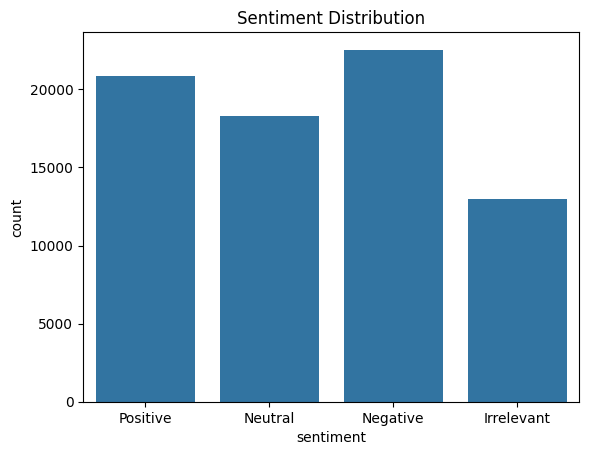

In [7]:
#  since the column sentiment is categorical we create a countplot to show the distribution between positve and negative

sentiment_graph = sns.countplot(x='sentiment', data=twitter_data)
sentiment_graph.set_title('Sentiment Distribution')
plt.show()
# from the graph we can conclude that the distribution is even

In [8]:
# here we perform some preprocessing steps on our tweet column
# 1. we convert all our text into lowercase
# 2. we remove stop words by importing the stopwords from corpus
# 3. we do lematization
# 4. we stem the words
# 5. we do tokenaization(to remove all non-alphanumerc characters)
# 7. replacing more than 3 consecutive letters with 2 letters for example yeeesss with yeess
# 8. we create a list called cleaned_tweet where we are going to append the preprocessed data




# we create a function called processed_data to do the above  8 steps


def processed_data(tweet):
    tweet_cleaned = []
    tweet = tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweet = [w for w in tweet_tokens if w not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemma_tweet = [lemmatizer.lemmatize(w) for w in filtered_tweet]
    stemmer = nltk.stem.PorterStemmer()
    stem_tweet = [stemmer.stem(w) for w in lemma_tweet]
    cleaned_tweet = ' '.join(stem_tweet)
    tweet_cleaned.append(cleaned_tweet)

    return tweet_cleaned













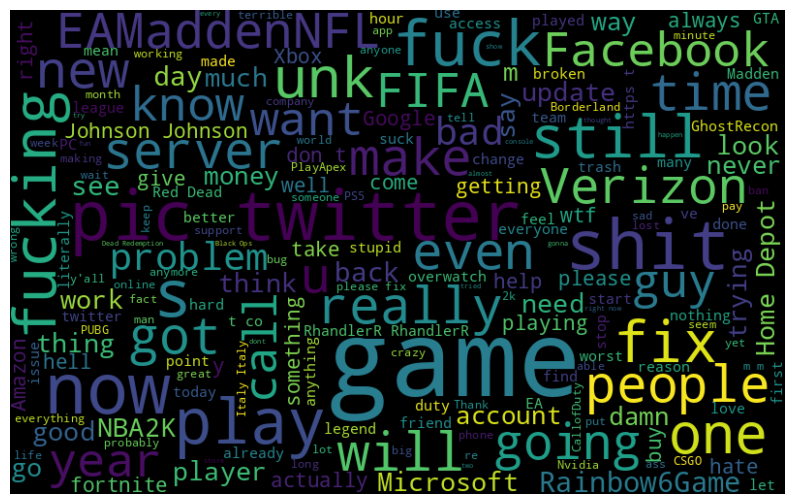

In [9]:
# we analyze our data.
#  we create a word cloud for negative tweets

# we analyze our data.
#  we create a word cloud for negative tweets

# Convert the 'tweet' column to strings and handle missing values
twitter_data['tweet'] = twitter_data['tweet'].astype(str).fillna('')

negative_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(" ".join(twitter_data[twitter_data['sentiment'] == 'Negative']['tweet']))
plt.figure(figsize=(10, 7))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

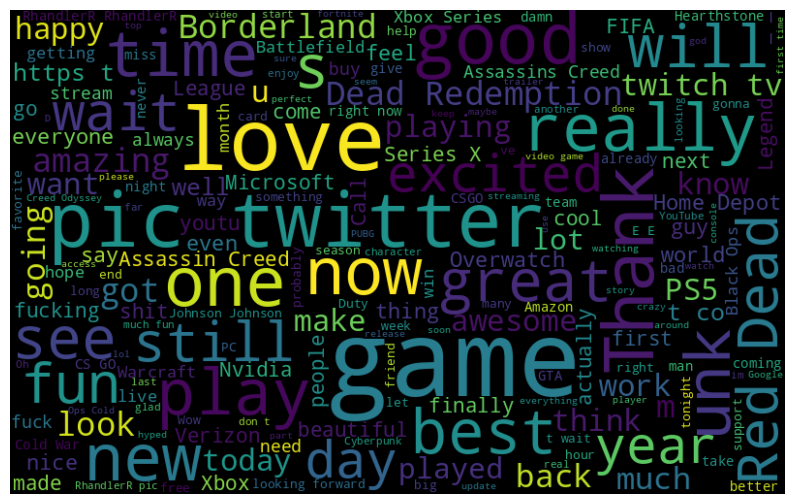

In [10]:
# we analyze our data.
#  we create a word cloud for positive tweets

# Convert the 'tweet' column to strings and handle missing values
twitter_data['tweet'] = twitter_data['tweet'].astype(str).fillna('')

positive_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(" ".join(twitter_data[twitter_data['sentiment'] == 'Positive']['tweet']))
plt.figure(figsize=(10, 7))
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

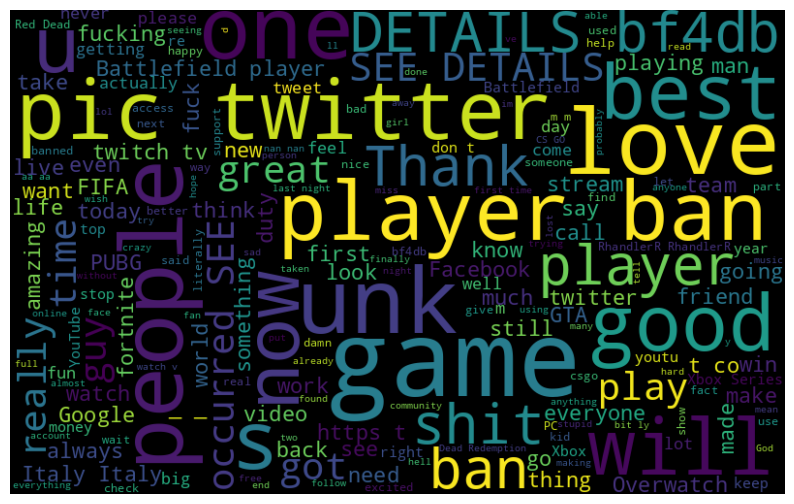

In [12]:
# we analyze our data.
#  we create a word cloud for illiterate tweets

# Convert the 'tweet' column to strings and handle missing values
twitter_data['tweet'] = twitter_data['tweet'].astype(str).fillna('')

illiterate_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(" ".join(twitter_data[twitter_data['sentiment'] == 'Irrelevant']['tweet']))
plt.figure(figsize=(10, 7))
plt.imshow(illiterate_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

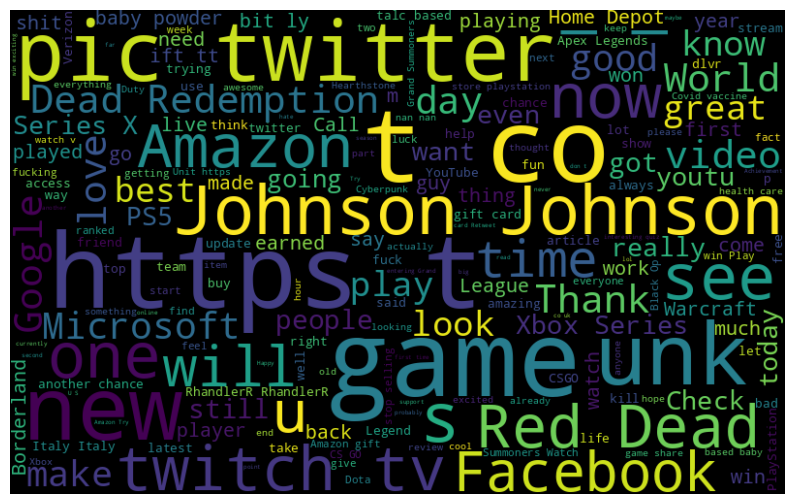

In [13]:
# we analyze our data.
#  we create a word cloud for negative tweets

# Convert the 'tweet' column to strings and handle missing values
twitter_data['tweet'] = twitter_data['tweet'].astype(str).fillna('')

neutral_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(" ".join(twitter_data[twitter_data['sentiment'] == 'Neutral']['tweet']))
plt.figure(figsize=(10, 7))
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted

from sklearn.preprocessing import LabelEncoder #Variable encoding and decoding for XGBoost

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
#  we split our data into x and y
#  x will be our list tweet_cleaned
#  y will be our column sentiment

x = twitter_data['tweet']
y = twitter_data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.3, random_state=42)




In [16]:
# TF-IDF is a numerical statistic intended to reflect how important a word is to a document in a collection or corpus.
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')

# limits number of unique words

Vectoriser fitted.


In [17]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [18]:
def model_Evaluate(model):

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))




In [19]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

              precision    recall  f1-score   support

  Irrelevant       0.94      0.82      0.88      3937
    Negative       0.89      0.92      0.91      6675
     Neutral       0.86      0.89      0.87      5386
    Positive       0.89      0.90      0.89      6407

    accuracy                           0.89     22405
   macro avg       0.89      0.88      0.89     22405
weighted avg       0.89      0.89      0.89     22405



In [22]:
data = [
    "Your services are bad, its not as expected",
    "I enjoyed my journey on this flight",
    "This is the worst plane experience in my life",
    "This is not good, improve!",
    "I like your services but improve on communication"
]
df = pd.DataFrame(data, columns=['Text'])
df

,Text
0,"Your services are bad, its not as expected"
1,I enjoyed my journey on this flight
2,This is the worst plane experience in my life
3,"This is not good, improve!"
4,I like your services but improve on communication


In [26]:
newdata_vectorized = vectoriser.transform(df['Text'])
outcome = LRmodel.predict(newdata_vectorized)
print('twitter_sentiment',  outcome)
#Improve the model to atleast 85%
outcomedf = pd.DataFrame(outcome, columns=['Sentiment'])
outcomedf

twitter_sentiment ['Negative' 'Positive' 'Negative' 'Negative' 'Neutral']


,Sentiment
0,Negative
1,Positive
2,Negative
3,Negative
4,Neutral


In [27]:
results = df.merge(outcomedf, left_index=True,right_index=True)
results

,Text,Sentiment
0,"Your services are bad, its not as expected",Negative
1,I enjoyed my journey on this flight,Positive
2,This is the worst plane experience in my life,Negative
3,"This is not good, improve!",Negative
4,I like your services but improve on communication,Neutral
